<a href="https://colab.research.google.com/github/naufalahnaf17/tensorflow_learning/blob/main/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 Dataset (Image Classification)

- Hal yang akan dilakukan pada notebook ini :
  
  1. Membuat Image Classification Dari Dataset Cifar-10
  2. Membuat Model Dengan Flatten dan Dense
  3. Membuat Model Dengan CNN dan MaxPool
  4. Membuat Augmentation Data dan Training Model (soon)
  5. Membuat Augmentation Data + Shuffle + Training (soon)

## 1. Pembuatan Model Non CNN

### Import yang diperlukan

In [37]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import models
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

### Check GPU dan Tensorflow Version

In [2]:
!nvidia-smi

Tue Jun 11 13:26:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
print("Tensorflow Version : " , tf.__version__)

Tensorflow Version :  2.15.0


### Download Dataset Cifar-10

In [53]:
cifar_data = tf.keras.datasets.cifar10

(train_images,train_labels) , (test_images,test_labels) = cifar_data.load_data()

### Data Exploration & Data Visualization

In [54]:
print("Train Images Shape : " , train_images.shape)
print("Train Images Shape : " , train_images.shape)
print("Test Images Shape : " , test_images.shape)
print("Test Images Shape : " , test_labels.shape)

Train Images Shape :  (50000, 32, 32, 3)
Train Images Shape :  (50000, 32, 32, 3)
Test Images Shape :  (10000, 32, 32, 3)
Test Images Shape :  (10000, 1)


In [55]:
# Setup Class Name

class_name = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

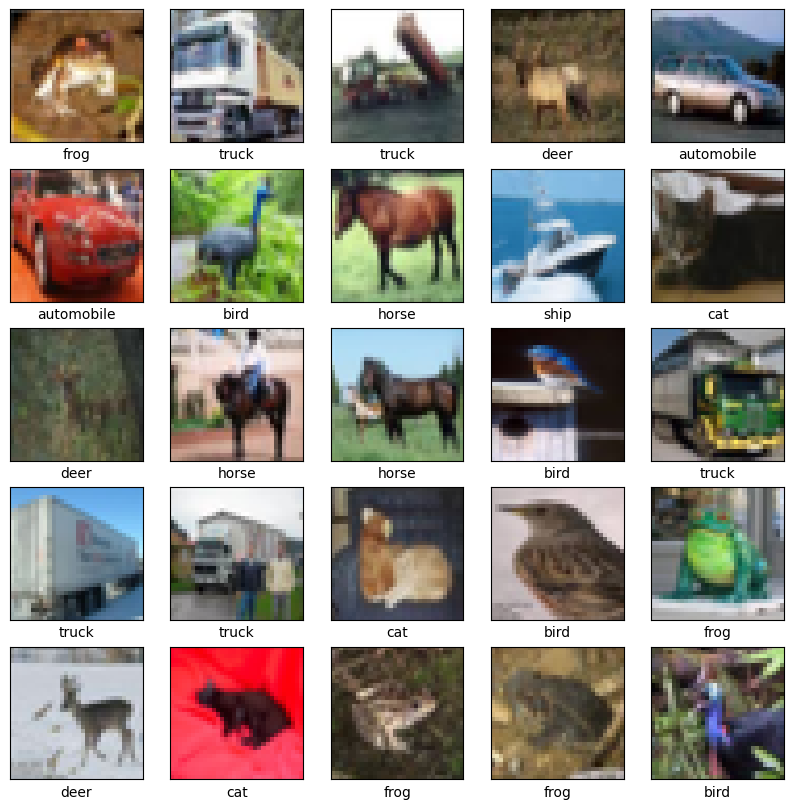

In [56]:
# Membuat function untuk memvisualisasikan data

def show_img():
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_name[train_labels[i][0]])
  plt.show()

show_img()

### Preprocess Data

Membuat preprocess data sederhana dengan rescale semua gambar dalam 0 dan 1

In [36]:
train_images = train_images / 255.
test_images = test_images / 255.

train_images.shape

(50000, 32, 32, 3)

### Membuat Model Untuk Image Classification dengan Flatten dan Dense

In [40]:
# Set Random Seed
tf.random.set_seed(42)

# Create Model
model_1 = models.Sequential()
model_1.add(Flatten(input_shape=(32,32,3)))
model_1.add(Dense(128,activation="relu"))
model_1.add(Dense(64,activation="relu"))
model_1.add(Dense(10))


# Compile Model
model_1.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics="accuracy"
)

# Fit dan Training Model
history_1 = model_1.fit(train_images,train_labels,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0102 - accuracy: 0.2549
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8546 - accuracy: 0.3282
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7830 - accuracy: 0.3558
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7307 - accuracy: 0.3760
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6867 - accuracy: 0.3915
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6525 - accuracy: 0.4049
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6227 - accuracy: 0.4170
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5958 - accuracy: 0.4263
Epoch 9/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5747 - accuracy: 0.4376
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.554

### Evaluasi Model dan Model Summary

In [41]:
# Evaluasi Model

model_1.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.4876 - accuracy: 0.4700


[1.487640619277954, 0.4699999988079071]

Loss : 1.4876

Accuracy: 0.4700 (47%)

Kesimpulan Model : Buruk 👎

<Axes: >

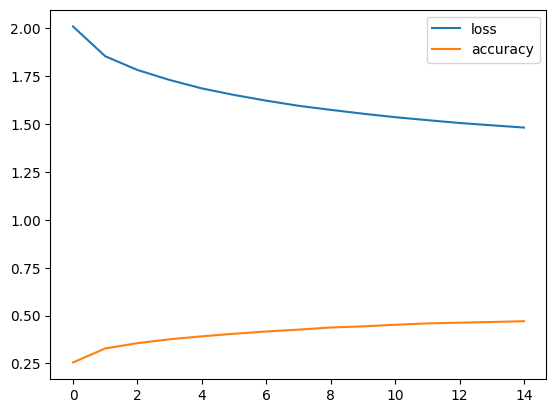

In [42]:
# Visualisasikan Training dan Loss

pd.DataFrame(history_1.history).plot()

313/313 [==============================] - 0s 1ms/step


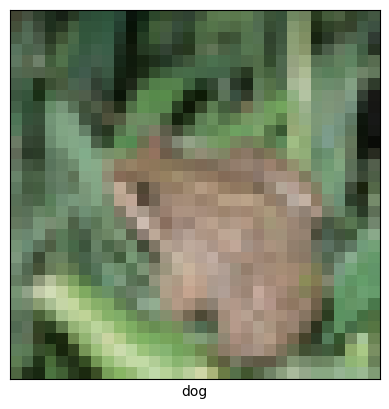

In [66]:
# Mencoba Prediksi Gambar dan Label dengan Model Yang telah Dibuat
probability_model = tf.keras.Sequential([model_1,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def show_prediction(i):
  plt.figure()
  plt.imshow(test_images[i])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_name[np.argmax(predictions[i])])
  plt.show()

show_prediction(4)

Karna Model yang dibuat akurasinya buruk, seharusnya Label nya "Frog" Namun Hasil prediksi yang dibuat malah "Dog"

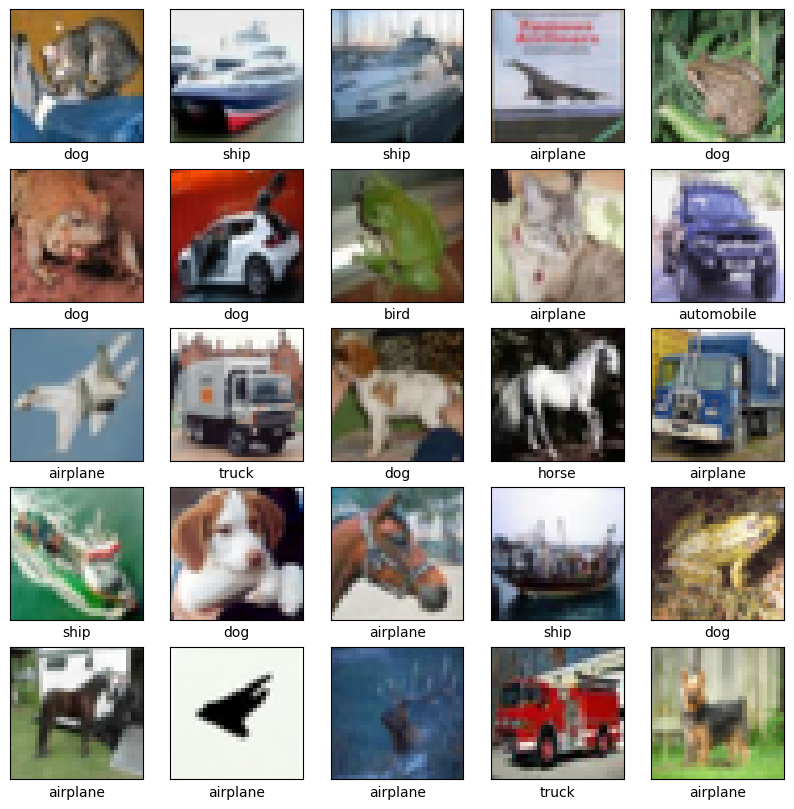

In [62]:
# Menampilkan Beberapa Prediction

def show_img_prediction():
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.imshow(test_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_name[np.argmax(predictions[i])])
  plt.show()

show_img_prediction()

In [63]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               393344    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Tuning Model

melakukan tuning pada baseline model yang telah dibuat dengan harapan meningkatkan akurasi dengan melakukan perubahan pada hyperparameter

- Menambahkan Hidden Layer
- Menambahkan Jumlah Epochs
- Menambahkan Learning Rate

In [64]:
# Set Random Seed
tf.random.set_seed(42)

# Create Model
model_2 = models.Sequential()
model_2.add(Flatten(input_shape=(32,32,3)))
model_2.add(Dense(128,activation="relu"))
model_2.add(Dense(128,activation="relu"))
model_2.add(Dense(64,activation="relu"))
model_2.add(Dense(64,activation="relu"))
model_2.add(Dense(32,activation="relu"))
model_2.add(Dense(10))


# Compile Model
model_2.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.02),
    metrics="accuracy"
)

# Fit dan Training Model
history_2 = model_2.fit(train_images,train_labels,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 18.8151 - accuracy: 0.0984
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3055 - accuracy: 0.0982
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3053 - accuracy: 0.1013
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3054 - accuracy: 0.1007
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3052 - accuracy: 0.1009
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3051 - accuracy: 0.1006
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3052 - accuracy: 0.0991
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3054 - accuracy: 0.1008
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3053 - accuracy: 0.0988
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.30

### Evaluasi Model yang telah Diganti Hyperparameter nya

In [65]:
# Evaluasi Model

model_2.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 2.3061 - accuracy: 0.1000


[2.306131362915039, 0.10000000149011612]

Loss : 2.3061

Accuracy: 0.1000 (10%)

Kesimpulan Model : Sangat Buruk 👎

313/313 [==============================] - 1s 3ms/step


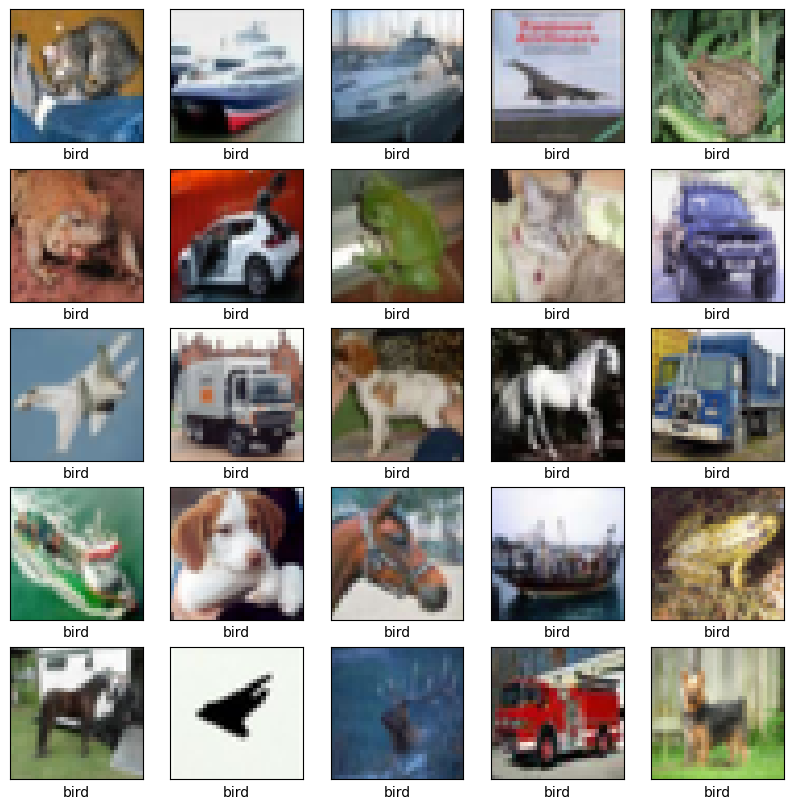

In [67]:
# Menampilkan beberapa prediksi gambar

probability_model = tf.keras.Sequential([model_2,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

show_img_prediction()

In [68]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               393344    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 10)              

#### Kesimpulan Pembuatan Model dari Dataset Cifar-10

Dengan 2 percobaan diatas **model_1** lebih baik dari pada **model_2**

Model 2 telah ditambahkan beberapa fully connected layer namun performanya malah lebih buruk dari pada model 1

Bisa kita lihat pada prediksi gambar yang ditampilkan Model 1 dan Model 2
- Model 1 seperti coin flip karna akurasi avg 47%
- Model 2 sangat buruk karna hanya mendeteksi pola bird saja

Mari kita lakukan Pembuatan Model dengan Convolutional Network Layer (CNN) dan mari kita bandingkan dengan model biasa

## Pembuatan Model CNN

## Import yang Diperlukan

In [69]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras import models
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

## Download Dataset

In [70]:
cifar_10 = tf.keras.datasets.cifar10

(train_images,train_labels) , (test_images,test_labels) = cifar_10.load_data()

## Check GPU dan Tensorflow Version

In [71]:
!nvidia-smi

Tue Jun 11 14:26:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0              30W /  70W |   4227MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [72]:
print("Tensorflow Version : " , tf.__version__)

Tensorflow Version :  2.15.0


## Exploration Data

In [73]:
print("Train Images Shape : " , train_images.shape)
print("Train Images Shape : " , train_images.shape)
print("Test Images Shape : " , test_images.shape)
print("Test Images Shape : " , test_labels.shape)

Train Images Shape :  (50000, 32, 32, 3)
Train Images Shape :  (50000, 32, 32, 3)
Test Images Shape :  (10000, 32, 32, 3)
Test Images Shape :  (10000, 1)


## Preprocess Data

In [74]:
train_images = train_images / 255.
test_images = test_images / 255.

## Pembuatan Model CNN

In [90]:
# Random Seed
tf.random.set_seed(42)

# Create Model
model_3 = models.Sequential()
model_3.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=(32,32,3)))
model_3.add(MaxPool2D(2,2))
model_3.add(tf.keras.layers.Dropout(0.5))

model_3.add(Conv2D(64,3,activation="relu"))
model_3.add(MaxPool2D(2,2))
model_3.add(tf.keras.layers.Dropout(0.5))

model_3.add(Flatten())

model_3.add(Dense(64,activation="relu"))
model_3.add(Dense(10,activation="softmax"))

# Compile Model
model_3.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics="accuracy"
)

# Fit dan Training Model
history_3 = model_3.fit(train_images,train_labels,epochs=15,validation_data=(test_images,test_labels))

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6023 - accuracy: 0.4164 - val_loss: 1.3056 - val_accuracy: 0.5385
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3025 - accuracy: 0.5331 - val_loss: 1.1730 - val_accuracy: 0.5973
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1949 - accuracy: 0.5739 - val_loss: 1.0695 - val_accuracy: 0.6327
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1317 - accuracy: 0.6000 - val_loss: 1.0782 - val_accuracy: 0.6318
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0889 - accuracy: 0.6139 - val_loss: 0.9881 - val_accuracy: 0.6634
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0564 - accuracy: 0.6275 - val_loss: 0.9872 - val_accuracy: 0.6574
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0304 - accuracy: 0.6376 - val_loss: 0.9989 - val_accuracy

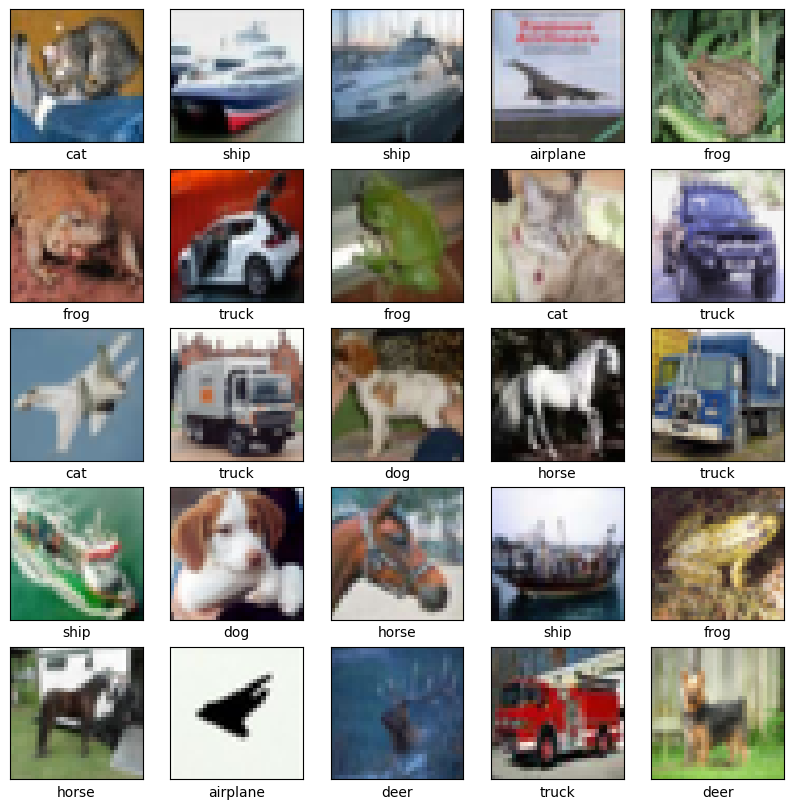

In [91]:
def show_img_prediction():
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.imshow(test_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_name[np.argmax(predictions[i])])
  plt.show()

show_img_prediction()